Current planned updates:

-add gui to edit the graph (line colors, legend size and captions, overall graph size,tickmark placement and spacing, probably more)

-I think if I add a gui then I need to make it save when done editing instead of when it's created too

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import glob
import os.path
import pandas as pd
import re
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

In [4]:
print("please enter the compound name")
compound = input()
print("are all files in the same folder? (y/n)(don't say no)")
folderchoice = input()
if folderchoice == 'y':
    print("Input folder location")
    file_directory = input()
    
if folderchoice == 'y':
        #finding the fermi level
    fermi = np.array([])

    rootname = file_directory+ '/' + compound +'.scf.out'

    readfile = open(rootname)
    xyz = readfile.readlines()

    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
             first = words[0]
        if first == "the":
            if words[1] == "Fermi":
                fermi = np.append(fermi, float(words[4]))
    print("Fermi level is" + str(fermi))

    rootname = file_directory + '/' + compound + '.bands.in'

    sym_points = np.array([])
    sym_xvalue = np.array([])
    kflag = 0



    readfile = open(rootname)
    xyz = readfile.readlines()

    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
             first = words[0]
        if first == "K_POINTS":
            kflag = 1
        if kflag == 1:
            hi = "hello"
            try: 
                sym_points = np.append(sym_points, words[5])
            except:
                pass

    kflag = 0

    #these lines allow for user input when choosing not these files, which would be the primary way to do it. it requires the full path name from whatever directory this file is in
    rootname = file_directory + '/' + compound + '.plotband.out'

    readfile = open(rootname)
    xyz = readfile.readlines()


    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
             first = words[0]
        if first == "high-symmetry":
            #this is just because of an error with the initial data set because I don't feel like figuring out why there is that extra point
            if words[7] != '6.3718':
                sym_xvalue = np.append(sym_xvalue, float(words[7]))
            else:
                print(hi)
        if first == "Range:":
            sym_xvalue = np.append(sym_xvalue, float(words[15]))

if folderchoice == 'n':
    #finding the fermi level
    fermi = np.array([])

    #these lines allow for user input when choosing not these files, which would be the primary way to do it. it requires the full path name from whatever directory this file is in

    print("enter file directory path for *.scf.out to find the fermi level")
    rootname = input()+ '/' + compound +'.scf.out'

    readfile = open(rootname)
    xyz = readfile.readlines()

    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
             first = words[0]
        if first == "the":
            if words[1] == "Fermi":
                fermi = np.append(fermi, float(words[4]))
    print(fermi)

    #these lines allow for user input when choosing not these files, which would be the primary way to do it. it requires the full path name from whatever directory this file is in

    print("enter file directory path for *.bands.in")
    rootname = input()+ '/' + compound + '.bands.in'

    sym_points = np.array([])
    sym_xvalue = np.array([])
    kflag = 0



    readfile = open(rootname)
    xyz = readfile.readlines()

    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
             first = words[0]
        if first == "K_POINTS":
            kflag = 1
        if kflag == 1:
            hi = "hello"
            try: 
                sym_points = np.append(sym_points, words[5])
            except:
                pass

    kflag = 0

    #these lines allow for user input when choosing not these files, which would be the primary way to do it. it requires the full path name from whatever directory this file is in

    print("enter file directory path for *.plotband.out")
    rootname = input()+ '/' + compound + '.plotband.out'

    readfile = open(rootname)
    xyz = readfile.readlines()


    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
             first = words[0]
        if first == "high-symmetry":
            #this is just because of an error with the initial data set because I don't feel like figuring out why there is that extra point
            if words[7] != '6.3718':
                sym_xvalue = np.append(sym_xvalue, float(words[7]))
            else:
                pass
        if first == "Range:":
            sym_xvalue = np.append(sym_xvalue, float(words[15]))


please enter the compound name
Si
are all files in the same folder? (y/n)(don't say no)
y
Input folder location
pdos_bands
Fermi level is[6.3349]
hello


In [5]:
#for entering the directory with the required files manually
if folderchoice == 'n':
    print("Enter directory with PDOS Files")
    directory = input()
    file_location = os.path.join(directory,"*.pdos_atm#*")
if folderchoice == 'y':
    file_location = os.path.join(file_directory,"*.pdos_atm#*")

pdos_files = glob.glob(file_location)
print(pdos_files)

['pdos_bands/Si.pdos_atm#1(Si)_wfc#1(s)', 'pdos_bands/Si.pdos_atm#2(Si)_wfc#2(p)', 'pdos_bands/Si.pdos_atm#2(Si)_wfc#1(s)', 'pdos_bands/Si.pdos_atm#1(Si)_wfc#2(p)']


In [6]:
#for entering the directory with the required files manually

if folderchoice == 'n':
    print("Enter directory with PDOS Files")
    directory = input()
    file_location = os.path.join('pdos_bands',"*.pdos_atm#*")
    pdos_files = glob.glob(file_location)
    #print(pdos_files)
    element = np.array([])
    atm_num = np.array([])
    wfc_num = np.array([])
    orbital = np.array([])
    datafile = np.array([])
    for file in pdos_files:
        match = re.search(file_directory + '(\D+)(\d?).pdos_atm#(\d+)((\D+))_wfc#(\d+)((\D+))', file)
        element = np.append(element,match.group(4))
        atm_num = np.append(atm_num,match.group(3))
        wfc_num = np.append(wfc_num,match.group(6))
        orbital = np.append(orbital,match.group(7))
        datafile = np.append(datafile,file)

if folderchoice == 'y':
    file_location = os.path.join(file_directory,"*.pdos_atm#*")

    pdos_files = glob.glob(file_location)
    #print(pdos_files)

    element = np.array([])
    atm_num = np.array([])
    wfc_num = np.array([])
    orbital = np.array([])
    datafile = np.array([])

    for file in pdos_files:
        match = re.search(file_directory + '(\D+)(\d?).pdos_atm#(\d+)((\D+))_wfc#(\d+)((\D+))', file)
        element = np.append(element,match.group(4))
        atm_num = np.append(atm_num,match.group(3))
        wfc_num = np.append(wfc_num,match.group(6))
        orbital = np.append(orbital,match.group(7))
        datafile = np.append(datafile,file)
df = pd.DataFrame({"file":datafile,"element":element,"atom number":atm_num,"wavefunction number":wfc_num,"orbital":orbital})

In [7]:
df

,file,element,atom number,wavefunction number,orbital
0,pdos_bands/Si.pdos_atm#1(Si)_wfc#1(s),(Si),1,1,(s)
1,pdos_bands/Si.pdos_atm#2(Si)_wfc#2(p),(Si),2,2,(p)
2,pdos_bands/Si.pdos_atm#2(Si)_wfc#1(s),(Si),2,1,(s)
3,pdos_bands/Si.pdos_atm#1(Si)_wfc#2(p),(Si),1,2,(p)


In [8]:
sort = df.sort_values(["element","orbital"], ascending = True)
sort

,file,element,atom number,wavefunction number,orbital
1,pdos_bands/Si.pdos_atm#2(Si)_wfc#2(p),(Si),2,2,(p)
3,pdos_bands/Si.pdos_atm#1(Si)_wfc#2(p),(Si),1,2,(p)
0,pdos_bands/Si.pdos_atm#1(Si)_wfc#1(s),(Si),1,1,(s)
2,pdos_bands/Si.pdos_atm#2(Si)_wfc#1(s),(Si),2,1,(s)


<IPython.core.display.Javascript object>


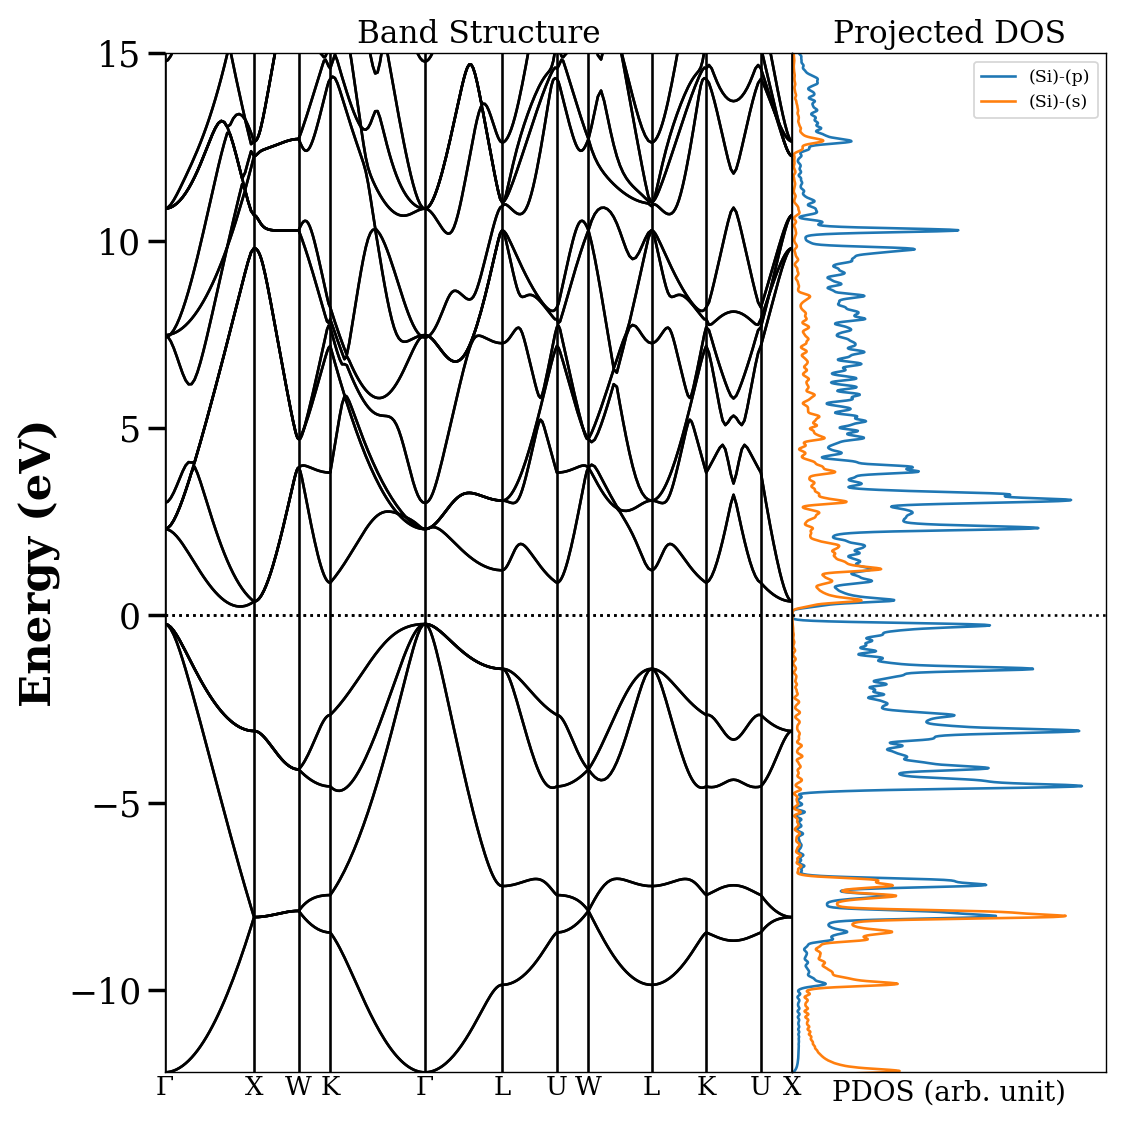

interactive(children=(FloatText(value=10.0, description='upper bound'), FloatText(value=-10.0, description='lo…

In [138]:
%matplotlib notebook
#these need to be set to whatever the default is on the graphing function below
currentupper = 10.0
currentlower = -10.0
saver = 'a'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9), sharey=True, gridspec_kw={'width_ratios': [2, 1],'wspace':0, 'hspace':0})
plt.rcParams['font.family'] = 'serif'

##########################
def PDOSGRAPHER(upper,lower):
    global currentlower, currentupper, saver
    
    boundchange = 0
        
    if (currentlower != lower) | (currentupper != upper):
        boundchange = 1
    if boundchange == 1:
        ax1.cla()
        ax2.cla()
    if folderchoice == 'y':
        file_location = os.path.join(file_directory,"*.dat.gnu")
        files = glob.glob(file_location)

        readfile = open(files[0])
        xyz = readfile.readlines()

        tempx = []
        tempy = []
        segments = []

    for line in xyz:
        first = 'hello'
        words = line.split()
        if words != []:
            tempx.append(float(words[0]))
            tempy.append(float(words[1]))
        if words == []:
            segments.append((tempx,tempy))
            tempx = []
            tempy = []
    segments.append((tempx, tempy))
            
    i = 0
    for x,y in segments:
        ax1.plot(x,(y - fermi),'black')
    ax1.set_ylabel('Energy (eV)', fontsize=25,fontweight='bold')
    ax1.axhline(y=0, linestyle='dotted', color='black')
    ax1.set_xticks([])
    ax1.tick_params(axis='y', which='major', length=10, width=2, labelsize=20)
    dataX = np.loadtxt(files[0], usecols=(0), unpack = True)
    xlow = np.min(dataX)
    xhigh = np.max(dataX)
    ax1.set_xlim(xlow,xhigh)
    ax1.set_title("Band Structure", fontsize=18)
    
    if folderchoice == 'n':
        print("input file directory for *.dat.gnu file")
        file_location = os.path.join(input(),"*.dat.gnu")
        files = glob.glob(file_location)
        print(files)
        readfile = open(files[0])
        xyz = readfile.readlines()

        tempx = []
        tempy = []
        segments = []

        for line in xyz:
            first = 'hello'
            words = line.split()
            if words != []:
                tempx.append(float(words[0]))
                tempy.append(float(words[1]))
            if words == []:
                segments.append((tempx,tempy))
                tempx = []
                tempy = []
        segments.append((current_x, current_y))

        i = 0
    for x,y in segments:
        ax1.plot(x,(y - fermi),'black')
    ax1.set_ylabel('Energy (eV)', fontsize=25)
    ax1.axhline(y=0, linestyle='dotted', color='black')
    ax1.set_xticks([])
    ax1.tick_params(axis='y', which='major', length=10, width=2, labelsize=20)
    
    #for entering the directory with the required files manually
    if folderchoice == 'n':
        print("Enter directory with PDOS Files")
        directory = input()
        file_location = os.path.join(directory,"*.pdos_atm#*")
        pdos_files = glob.glob(file_location)
        last_file = "a"
        last_orbital = "z"
        last_element = "AAAAA"
        i = 0

        once = 0
        dataYcheck = 0

        new_dataY =np.array([])
        for index, row in sort.iterrows():
            dataX, dataY = np.loadtxt(row["file"], usecols=(0,1), unpack = True)
            if dataYcheck == 0:
                new_dataY = np.append(new_dataY, dataY)
            if (row["element"] == last_element) & (row["orbital"] == last_orbital):
                old_dataX, old_dataY = np.loadtxt(last_file, usecols=(0,1), unpack = True)
                if len(old_dataY) != len(new_dataY):
                    ranger = len(old_dataY)
                    new_dataY = new_dataY[:ranger] + old_dataY
                else:
                    new_dataY = new_dataY + old_dataY
            if ((row["element"] != last_element) | (row["orbital"] != last_orbital)) & once == 1:
                ymin = np.min(new_dataY)
                ymax = np.max(new_dataY)
                try:
                    ax2.plot(new_dataY, dataX - fermi, label=f"{last_element}-{last_orbital}")
                    new_dataY =np.array([])
                except:
                    ax2.plot(new_dataY[:ranger], dataX - fermi, label=f"{last_element}-{last_orbital}")
                    new_dataY =np.array([])
                plt.legend()
            once = 1
            last_element = row["element"]
            last_orbital = row["orbital"]
            last_file = row["file"]
            i += 1
        ymin = np.min(new_dataY)
        ymax = np.max(new_dataY)
        ax2.plot((new_dataY),dataX-fermi,label = last_element + '-'+ last_orbital)
        ax2.set_xlim(ymin,ymax+.3)
        ax2.axhline(y=0, linestyle='dotted', color='black')
        ax2.set_xticks([])
        ax2.tick_params(axis='y', which='major', length=0, width=0, labelsize=0)
        ax2.set_xlabel("PDOS (arb. unit)", fontsize=16)
        ax2.set_title("Projected DOS", fontsize=18)
        ax2.legend()
        lowest = np.min((dataX-fermi))
        print("Please select the lower bound of your PDOS graph")
        lower = input()
        print("Please select the upper bound of your PDOS graph")
        upper = input()
        ax1.set_ylim(float(lower),float(upper))
        i = 0
        try:
            for i, value in enumerate(sym_xvalue):
                ax1.axvline(x=value, color='black')
                ax1.text(value, float(lower)- .5, sym_points[i], fontsize=15, ha = 'center')
                i += 1
        except:
            pass
        plt.tight_layout()
        print("save as eps,pdf, or not at all?(capitalization matters)")
        savetype = input()
        if savetype == "pdf":
            fig.savefig(compound + " PDOS.pdf", format="pdf")
        if savetype == "eps":
            fig.savefig(compound + " PDOS.eps", format="eps")

    if folderchoice == 'y':
        file_location = os.path.join(file_directory,"*.pdos_atm#*")
        pdos_files = glob.glob(file_location)
        last_file = "a"
        last_orbital = "z"
        last_element = "AAAAA"
        i = 0

        once = 0
        dataYcheck = 0
            
        new_dataY =np.array([])
        for index, row in sort.iterrows():
            dataX, dataY = np.loadtxt(row["file"], usecols=(0,1), unpack = True)
            if dataYcheck == 0:
                new_dataY = np.append(new_dataY, dataY)
            if (row["element"] == last_element) & (row["orbital"] == last_orbital):
                old_dataX, old_dataY = np.loadtxt(last_file, usecols=(0,1), unpack = True)
                if len(old_dataY) != len(new_dataY):
                    ranger = len(old_dataY)
                    new_dataY = new_dataY[:ranger] + old_dataY
                else:
                    new_dataY = new_dataY + old_dataY
            if ((row["element"] != last_element) | (row["orbital"] != last_orbital)) & once == 1:
                ymin = np.min(new_dataY)
                ymax = np.max(new_dataY)
                try:
                    ax2.plot(new_dataY, dataX - fermi, label=f"{last_element}-{last_orbital}")
                    new_dataY =np.array([])
                except:
                    ax2.plot(new_dataY[:ranger], dataX - fermi, label=f"{last_element}-{last_orbital}")
                    new_dataY =np.array([])
                plt.legend()
            once = 1
            last_element = row["element"]
            last_orbital = row["orbital"]
            last_file = row["file"]
            i += 1
        ymin = np.min(new_dataY)
        ymax = np.max(new_dataY)
        ax2.plot((new_dataY),dataX-fermi,label = last_element + '-'+ last_orbital)
        ax2.set_xlim(ymin,ymax+.3)
        ax2.axhline(y=0, linestyle='dotted', color='black')
        ax2.set_xticks([])
        ax2.tick_params(axis='y', which='major', length=0, width=0, labelsize=0)
        ax2.set_xlabel("PDOS (arb. unit)", fontsize=16)
        ax2.set_title("Projected DOS", fontsize=18)
        ax2.legend()
        lowest = np.min((dataX-fermi))

        ax1.set_ylim(float(lower),float(upper))
        i = 0
        try:
            for i, value in enumerate(sym_xvalue):
                ax1.axvline(x=value, color='black')
                ax1.text(value, lower- .6, sym_points[i], fontsize=15, ha = 'center')
                i += 1
        except:
            pass
        plt.tight_layout()
        currentlower = lower
        currentupper = upper
    plt.show()
interact(PDOSGRAPHER, upper = widgets.FloatText(value=10,description='upper bound',disabled=False),
         lower = widgets.FloatText(value=-10,description='lower bound',disabled=False))
button = widgets.Button(
    description='Save',
    disabled=False,
    button_style='', 
    tooltip='Click me',
    icon='check'
)
format_dropdown = widgets.Dropdown(
    options=[('PDF', 'pdf'), ('EPS', 'eps')],
    description='File Format:'
)

def save(b):
    print("saved!")
    savetype = format_dropdown.value
    if savetype == "pdf":
        fig.savefig(textbox.value + ".pdf", format="pdf")
    if savetype == "eps":
        fig.savefig(textbox.value + " PDOS.eps", format="eps")
textbox = widgets.Text(
    value =compound + ' PDOS',
    placeholder='Type something',
    description='File name:',
    disabled=False
)
button
button.on_click(save)
ui = widgets.HBox([format_dropdown,textbox, button])
display(ui)